In [ ]:
pip install SQLAlchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 47.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename='logs/ingestion_db.log',
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filemode='a'
)

engine = create_engine('sqlite:///inventory.db')




In [ ]:
def ingest_db(df,table_name, engine):
  df.to_sql(table_name, con = engine, if_exists='replace', index= False)




In [ ]:
def load_raw_data():
  '''this function will load the CSVs as dataframe and ingest into db'''
  start = time.time()
  for file in os.listdir('data'):
    if '.csv' in file:
      df = pd.read_csv('/content/drive/MyDrive/Datasets/data/'+file)
      logging.info(f'Ingesting {file} in db')
      ingest_db(df, file[:-4], engine)
  end = time.time()
  total_time = (end-start)/60
  logging.info('-----------Ingestion Complete-----------')
  logging.info(f'\nTotal Time Taken: {total_time} minutes')


if __name__ == '__main__':
  load_raw_data()

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
# conn = sqlite3.connect('inventory.db')
conn = sqlite3.connect('/content/drive/MyDrive/Datasets/data/inventory.db')

In [ ]:
#checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)
tables

,name
0,purchase_prices
1,sales
2,vendor_invoice
3,purchases
4,end_inventory
5,begin_inventory


In [ ]:
# exploring what type of data available in the tables
for table in tables['name']:
  print('-'*50, f'{table}','-'*50)
  print('count of records:',pd.read_sql(f"select count(*) as count from {table}", conn)['count'].values[0])
  display(pd.read_sql(f"select * from {table} limit 5",conn))

-------------------------------------------------- purchase_prices --------------------------------------------------
count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
count of records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- purchases --------------------------------------------------
count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- end_inventory --------------------------------------------------
count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- begin_inventory --------------------------------------------------
count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


In [ ]:
# choosing one vendor and filtering the different tables
purchases = pd.read_sql_query("""select * from purchases where VendorNumber = 4466""", conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [ ]:
vendor_invoice = pd.read_sql_query("""select * from vendor_invoice where VendorNumber = 4466""", conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [ ]:
sales = pd.read_sql_query("""select * from sales where VendorNo = 4466""",conn)

purchase_prices = pd.read_sql_query("""select * from purchase_prices where VendorNumber = 4466""",conn)

In [ ]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [ ]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [ ]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [ ]:
vendor_invoice['PONumber'].nunique()

55

In [ ]:
sales = pd.read_sql_query("""select * from sales where VendorNo = 4466""",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [ ]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,50531.10,30071.85,3890
5215,60416.49,41542.02,4651
5255,79187.04,51180.60,6096


* The purchase table contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.
*The purchase price column is derived from the purchase_price table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in the table.
*The vendor_invoice table aggregates data from the purchase table, summarizing quantity and dollar amounts, amoung with an additional column fro freight.
This table maintains uniqueness based on vender and PO nnumber.
* The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quality sold, the selling price, and the revenue earned.

---

As the data we need for analysis is distributed in different tables, we need create a summary table containing:

* purchase transactions made by vendors
* sales transaction data
* freight costs for each vendor
* actual product prices from vendors

Let's first explore each summary in different tables.

In [ ]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [ ]:
frieght_summary = pd.read_sql_query("""select VendorNumber, SUM(Freight) as FreightCost
From vendor_invoice
Group by VendorNumber""", conn)

In [ ]:
frieght_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [ ]:
pd.read_sql_query("""SELECT
p.VendorNumber,
p.VendorName,
p.Brand,
p.PurchasePrice,
pp.Volume,
pp.Price as ActualPrice,
SUM(p.Quantity) as TotalPurchaseQuantity,
SUM(p.Dollars) as TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
ON p.Brand = pp.Brand
WHERE p.PurchasePrice > 0
GROUP BY p.VendorNumber, p.VendorName, p.Brand
ORDER BY TotalPurchaseDollars""", conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [ ]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [ ]:
pd.read_sql_query("""SELECT
VendorNo,
Brand,
SUM(SalesDollars) as TotalSalesDollars,
SUM(SalesPrice) as TotalSalesPrice,
SUM(SalesQuantity) as TotalSalesQuantity,
SUM(ExciseTax) as TotalExciseTax
FROM sales
GROUP BY VendorNo, Brand
ORDER BY TotalSalesDollars""",conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004,5287,9.800000e-01,0.98,2,0.10
1,9206,2773,9.900000e-01,0.99,1,0.05
2,3252,3933,1.980000e+00,0.99,2,0.10
3,3924,9123,1.980000e+00,0.99,2,0.10
4,10050,3623,1.980000e+00,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4.223108e+06,545778.28,135838,249587.83
11268,3960,4261,4.475973e+06,420050.01,200412,368242.80
11269,17035,8068,4.538121e+06,461140.15,187140,343854.07
11270,4425,3405,4.819073e+06,561512.37,160247,294438.66


In [ ]:
# merging all the summary table to create an aggregated summary table for further analysis
vendor_sales_summary = pd.read_sql_query("""WITH FreightSummary AS (
SELECT
  VendorNumber,
  SUM(Freight) as FreightCost
From vendor_invoice
Group by VendorNumber
),


PurchaseSummary AS (
  SELECT
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.Price as ActualPrice,
    pp.Volume,
    SUM(p.Quantity) as TotalPurchaseQuantity,
    SUM(p.Dollars) as TotalPurchaseDollars
  FROM purchases p
  JOIN purchase_prices pp
    ON p.Brand = pp.Brand
  WHERE p.PurchasePrice > 0
  GROUP BY p.VendorNumber, p.VendorName, p.Brand,p.Description, p.PurchasePrice, pp.Price, pp.Volume
),


SalesSummary AS (
  SELECT
    VendorNo,
    Brand,
    SUM(SalesQuantity) as TotalSalesQuantity,
    SUM(SalesDollars) as TotalSalesDollars,
    SUM(SalesPrice) as TotalSalesPrice,
    SUM(ExciseTax) as TotalExciseTax
  FROM sales
  GROUP BY VendorNo, Brand
)

SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
  FROM PurchaseSummary ps
  LEFT JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
    AND ps.Brand = ss.Brand
  LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
  ORDER BY ps.TotalPurchaseDollars DESC""", conn)

In [ ]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07


This query generates a vendor-wise sales and purchase summary, which is valuable for:

**Performance Optimization:**
* The query involves heavy joins and aggreagtions on large datasets like sales and purchases.
* String the pre-aggregated results avoids repeated expensive computations.
* Helps in analyzing sales, purchases, and pricing for different vendors and brands.
* Future Benefits of Storing this data for faster Dashboarding & Reporting.
* Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.

Let's clean the data if there is any inconsistencies.

# Data Cleaning

In [ ]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,object
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesQuantity,float64


In [ ]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesQuantity,178


In [ ]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [ ]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

In [ ]:
vendor_sales_summary['Voume'] = vendor_sales_summary['Volume'].astype('float64')


In [ ]:
vendor_sales_summary.fillna(0, inplace = True)

In [ ]:
vendor_sales_summary['VenderName'] = vendor_sales_summary['VendorName'].str.strip()

In [ ]:
# creating new columns for better analysis
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars'])*100
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']
vendor_sales_summary['StockToPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']

In [ ]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'Voume',
       'VenderName', 'GrossProfit', 'ProfitMargin', 'StockTurnover',
       'StockToPurchaseRatio'],
      dtype='object')

In [ ]:
cursor = conn.cursor()

In [ ]:
cursor.execute("""CREATE TABLE vendor_sales_summary (
  VendorNumber INT,
  VendorName VARCHAR(100),
  Brand INT,
  Description VARCHAR(100),
  PurchasePrice DECIMAL(10,2),
  ActualPrice DECIMAL(10,2),
  Volume,
  TotalPurchaseQuantity INT,
  TotalPurchaseDollars DECIMAL(15,2),
  TotalSalesQuantity INT,
  TotalSalesDollars DECIMAL(15,2),
  TotalSalesPrice DECIMAL(15,2),
  TotalExciseTax DECIMAL(15,2),
  FreightCost DECIMAL(15,2),
  GrossProfit DECIMAL(15,2),
  ProfitMargin DECIMAL(15,2),
  StockTurnover DECIMAL(15,2),
  StockToPurchaseRatio DECIMAL(15,2),
  PRIMARY KEY(VendorNumber, Brand)
);
""")

In [ ]:
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists='replace', index = False)

10692

In [ ]:
pd.read_sql_query("select * from vendor_sales_summary", conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Voume,VenderName,GrossProfit,ProfitMargin,StockTurnover,StockToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1750.0,BROWN-FORMAN CORP,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1750.0,MARTIGNETTI COMPANIES,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1750.0,PERNOD RICARD USA,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1750.0,DIAGEO NORTH AMERICA INC,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1750.0,DIAGEO NORTH AMERICA INC,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,750.0,WINE GROUP INC,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,50.0,SAZERAC CO INC,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,50.0,HEAVEN HILL DISTILLERIES,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,200.0,DIAGEO NORTH AMERICA INC,141.81,98.974037,72.000000,97.469388


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sqlalchemy import create_engine
import logging
import time
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/Datasets/data/inventory.db')

**# Loading the dataset**

In [ ]:
df1 = pd.read_sql_query("select * from vendor_sales_summary", conn)
df1.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Voume,VenderName,GrossProfit,ProfitMargin,StockTurnover,StockToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1750.0,BROWN-FORMAN CORP,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1750.0,MARTIGNETTI COMPANIES,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1750.0,PERNOD RICARD USA,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1750.0,DIAGEO NORTH AMERICA INC,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1750.0,DIAGEO NORTH AMERICA INC,1199901.61,28.412764,0.983556,1.396897


In [ ]:
df1.to_csv('vendor_sales_summary.csv',index  = False)

In [ ]:
# Summary statistics for numerical columns
summary_stats = df1.describe().T
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8565.0,10107.041331,17634.685420,2.000000e+00,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8565.0,17614.046468,12945.503736,5.800000e+01,5376.000000,17601.000000,24935.000000,9.063100e+04
PurchasePrice,8565.0,21.779365,81.185007,3.600000e-01,6.660000,10.060000,17.850000,3.352930e+03
ActualPrice,8565.0,32.295213,112.414374,4.900000e-01,9.990000,14.990000,25.990000,4.559990e+03
TotalPurchaseQuantity,8565.0,3771.571395,12276.310633,1.000000e+00,42.000000,431.000000,2666.000000,3.376600e+05
TotalPurchaseDollars,8565.0,35883.087602,136715.560071,7.100000e-01,545.490000,5017.200000,26600.610000,3.811252e+06
TotalSalesQuantity,8565.0,3748.547577,12125.055208,1.000000e+00,62.000000,490.000000,2675.000000,3.349390e+05
TotalSalesDollars,8565.0,51536.284564,186061.452634,1.980000e+00,1349.850000,8482.220000,40613.050000,5.101920e+06
TotalSalesPrice,8565.0,22756.625624,49303.003032,9.900000e-01,584.610000,4549.650000,22595.120000,6.728193e+05
TotalExciseTax,8565.0,2182.553748,12225.226634,1.000000e-01,9.450000,84.760000,594.460000,3.682428e+05


In [ ]:
# Mode for each numerical column
mode_values = df1.mode().iloc[0]
print("\nMode Values:\n\n", mode_values)


Mode Values:

 VendorNumber                            4425.0
VendorName               MARTIGNETTI COMPANIES
Brand                                      809
Description                   Southern Comfort
PurchasePrice                             6.53
ActualPrice                               9.99
Volume                                     750
TotalPurchaseQuantity                     12.0
TotalPurchaseDollars                     79.44
TotalSalesQuantity                        12.0
TotalSalesDollars                       167.88
TotalSalesPrice                          11.99
TotalExciseTax                            1.35
FreightCost                          144929.24
Voume                                    750.0
VenderName               MARTIGNETTI COMPANIES
GrossProfit                              44.52
ProfitMargin                         33.333333
StockTurnover                              1.0
StockToPurchaseRatio                       1.5
Name: 0, dtype: object


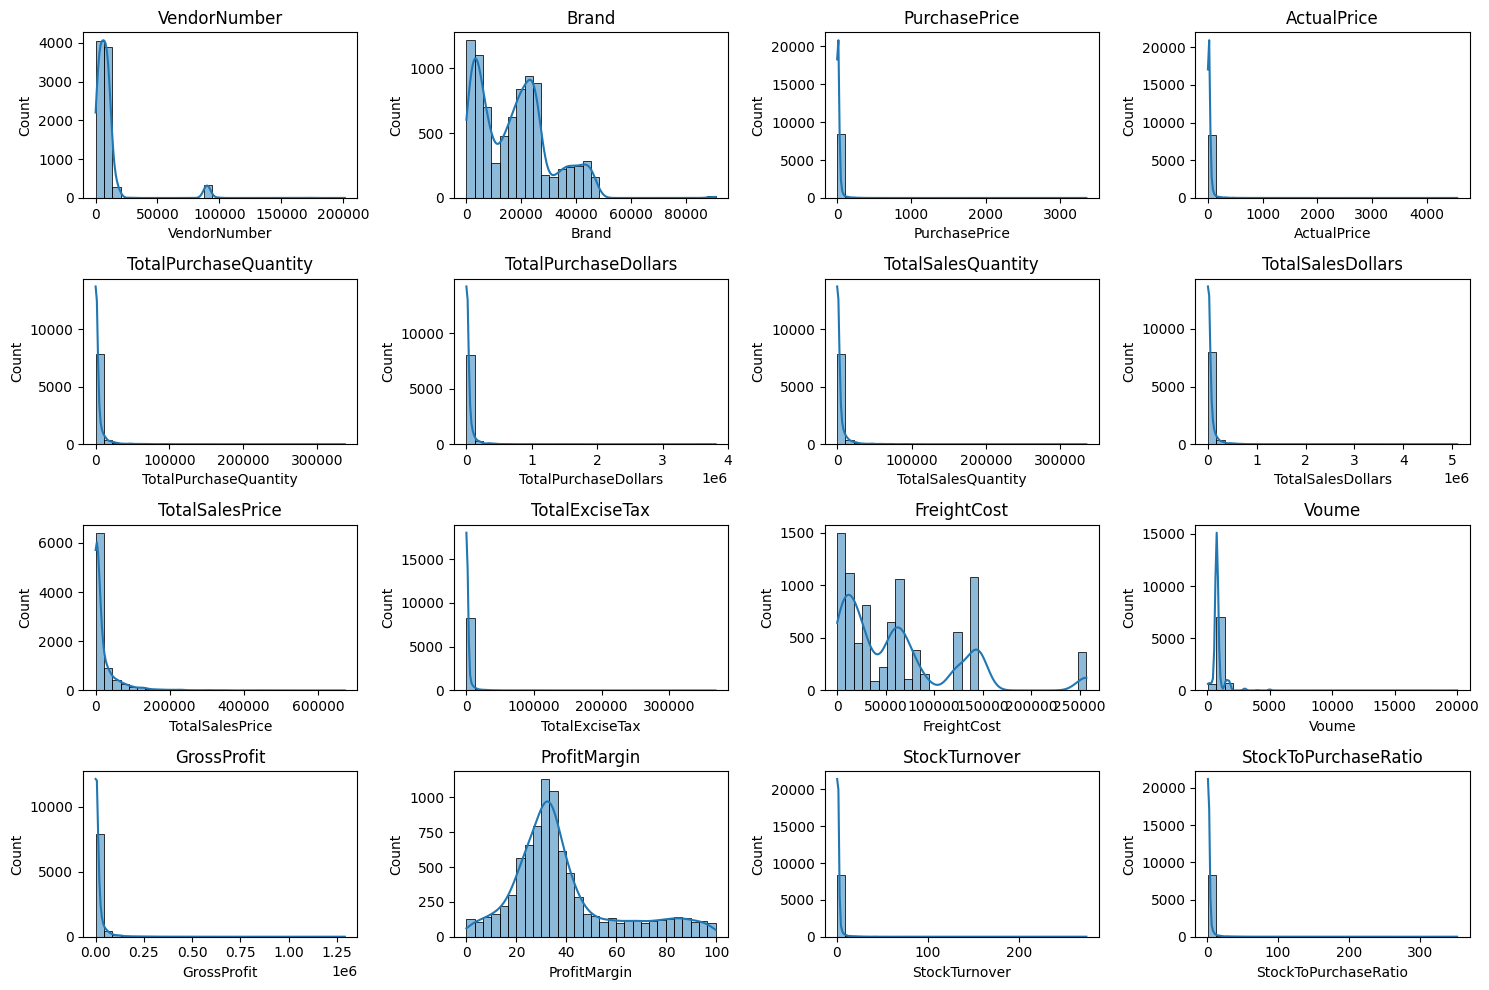

In [ ]:
#Distribution Plots for Numerical Columns
numerical_cols = df1.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4, 4, i+1)    #Adjust grid layout as needed
  sns.histplot(df1[col], kde=True, bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

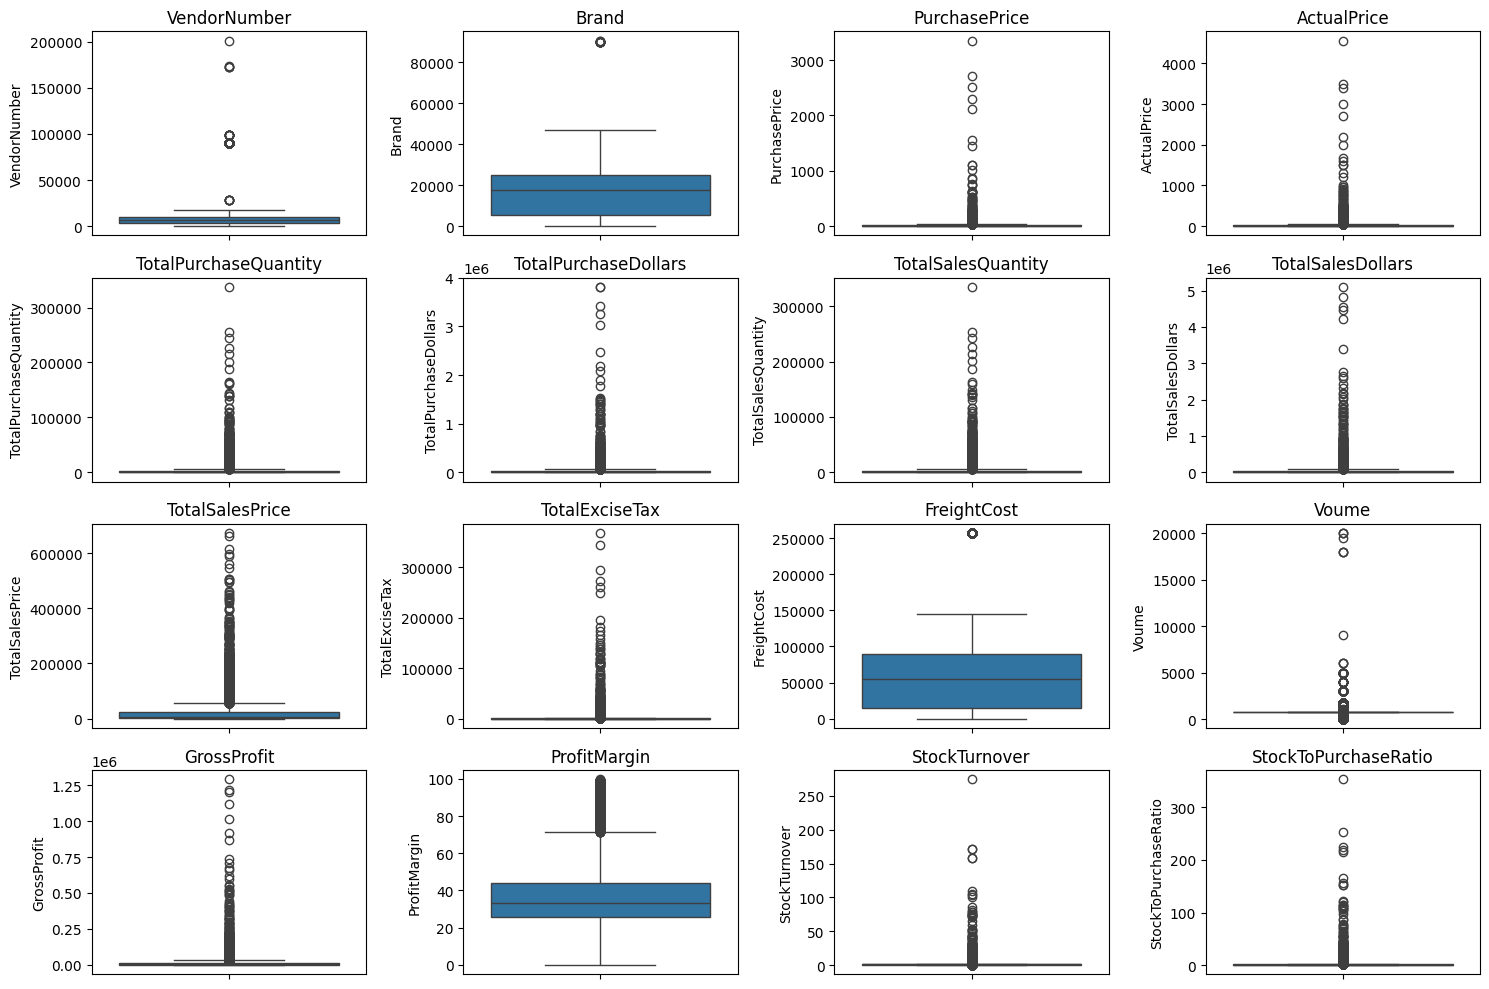

In [ ]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights

### Negative & Zero Values:
* Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..

* Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

### Outliers Indicated by High Standard Deviations:

* Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

* Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

* Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [ ]:
# Lets filter the data by removing inconsistencies
df1 = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0
""", conn)

In [ ]:
df1

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Voume,VenderName,GrossProfit,ProfitMargin,StockTurnover,StockToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1750.0,BROWN-FORMAN CORP,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1750.0,MARTIGNETTI COMPANIES,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1750.0,PERNOD RICARD USA,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1750.0,DIAGEO NORTH AMERICA INC,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1750.0,DIAGEO NORTH AMERICA INC,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,750.0,WINE GROUP INC,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,50.0,SAZERAC CO INC,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,50.0,HEAVEN HILL DISTILLERIES,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,200.0,DIAGEO NORTH AMERICA INC,141.81,98.974037,72.000000,97.469388


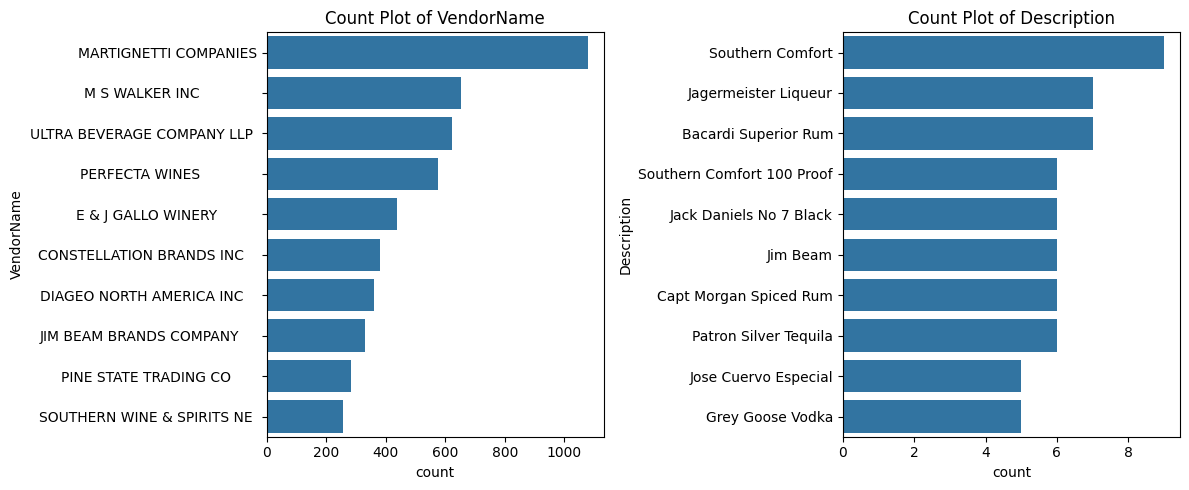

In [ ]:
#Count Plots for Categorical Columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
  plt.subplot(1,2,i+1)
  sns.countplot(y=df1[col], order=df1[col].value_counts().index[:10])   # Top 10 categories
  plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

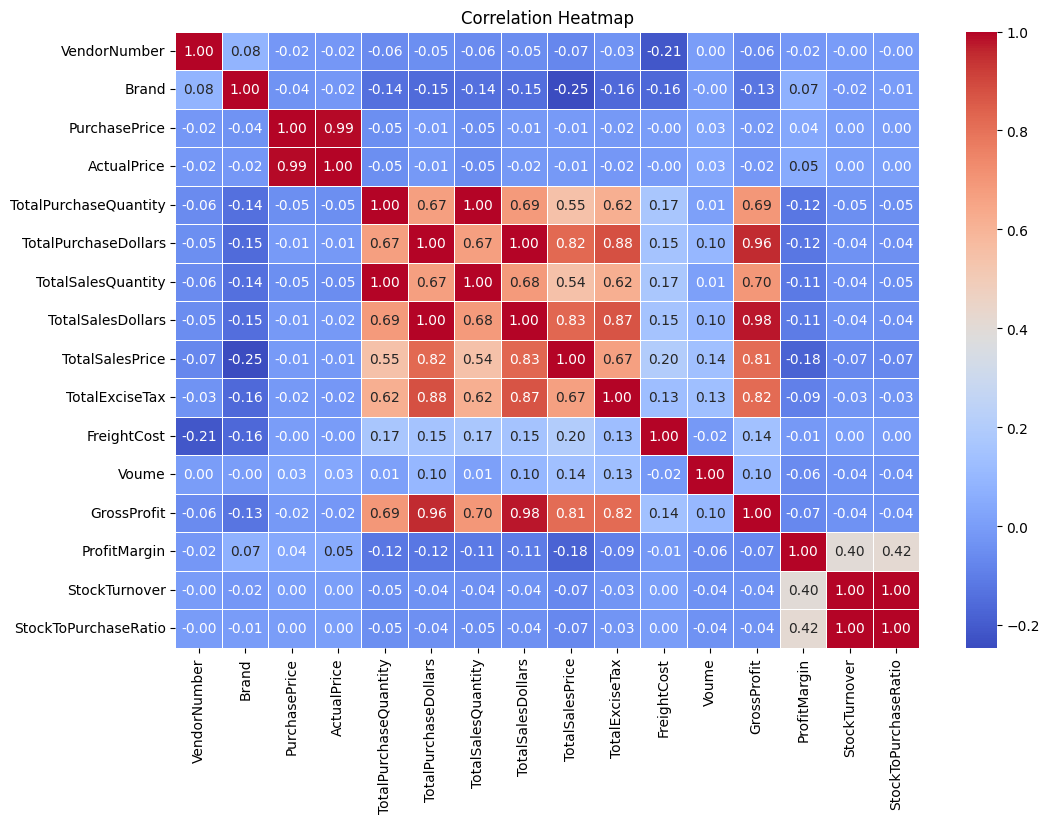

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df1[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights

* PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

* Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

* StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis

### Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [ ]:
brand_performance = df1.groupby('Description').agg({
    'TotalSalesDollars': 'sum',  # Sales performance metric
    'ProfitMargin': 'mean'       # Average profit margin
}).reset_index()

brand_performance.sort_values('ProfitMargin')

,Description,TotalSalesDollars,ProfitMargin
5485,Pepperjack Barossa Red,191.92,0.020842
2954,Flint & Steel Svgn Bl Napa V,119.92,0.033356
2179,Croft Tawny Porto,191.84,0.041701
2561,Douglass Hill Merlot,143.76,0.083472
5385,Parducci 13 True Grit Chard,24927.81,0.121190
...,...,...,...
4568,M Chiarlo Gavi Wh,1208.90,99.393664
657,Beniotome Sesame Shochu,4768.41,99.534226
6449,Skinnygirl Tangerine Vodka,2368.42,99.544844
2411,DiSaronno Amaretto,4781.16,99.553246


In [ ]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [ ]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [ ]:
low_sales_threshold

np.float64(560.299)

In [ ]:
high_margin_threshold

np.float64(64.97017552750111)

In [ ]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales nut Hight Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales nut Hight Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


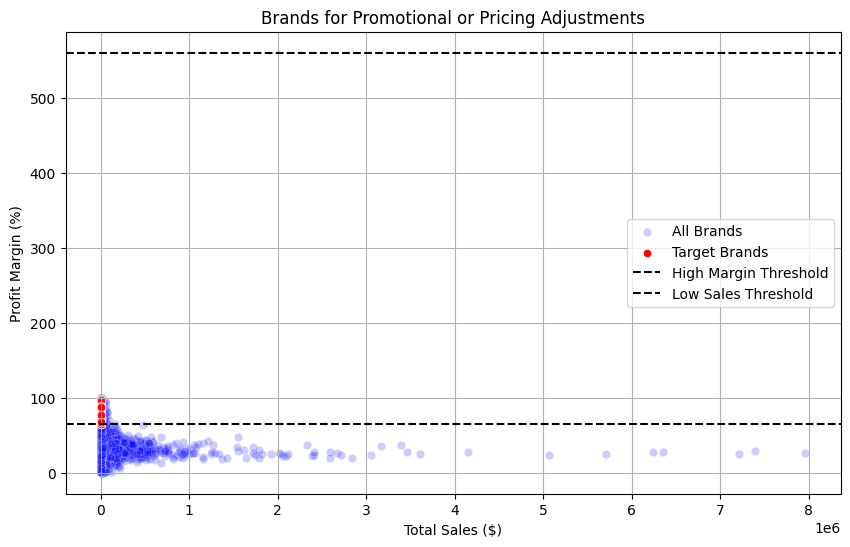

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance ,x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands ,x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle ="--", color ="black", label="High Margin Threshold")
plt.axhline(low_sales_threshold, linestyle ="--", color ="black", label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]  #for better visualization

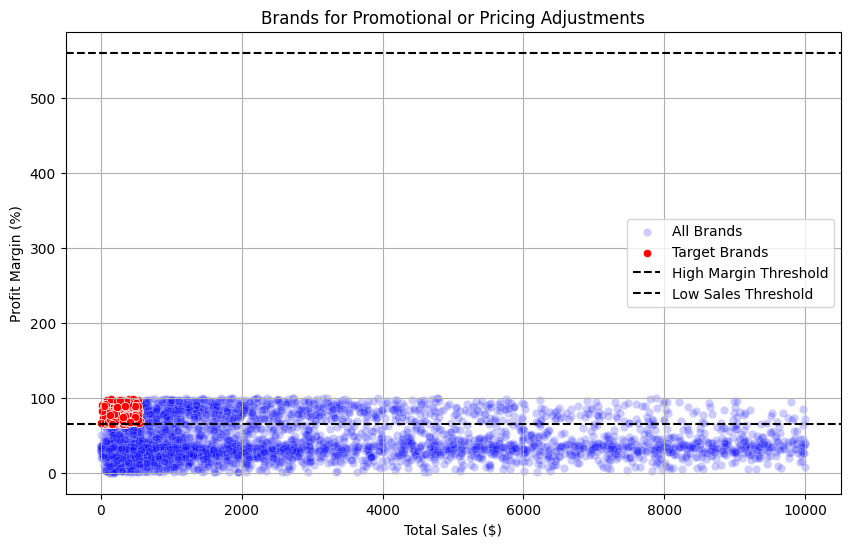

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance ,x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands ,x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle ="--", color ="black", label="High Margin Threshold")
plt.axhline(low_sales_threshold, linestyle ="--", color ="black", label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendor and brands demonstrate the highest sales performance ?

In [ ]:
def format_dollars(value):
  if value >= 1_000_000:
    return f"{value/1_000_000:.2f}M"
  elif value >= 1_000:
    return f"{value/1_000:.2f}K"
  else:
    return str(value)

In [ ]:
# Top Vendors & Brands by Sales Performance
top_vendors = df1.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df1.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,6.799010e+07
MARTIGNETTI COMPANIES,3.927640e+07
PERNOD RICARD USA,3.206320e+07
JIM BEAM BRANDS COMPANY,3.142302e+07
BACARDI USA INC,2.485482e+07
CONSTELLATION BRANDS INC,2.421875e+07
E & J GALLO WINERY,1.839990e+07
BROWN-FORMAN CORP,1.824723e+07
ULTRA BEVERAGE COMPANY LLP,1.650254e+07


In [ ]:
top_brands

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7964746.76
Tito's Handmade Vodka,7399657.58
Grey Goose Vodka,7209608.06
Capt Morgan Spiced Rum,6356320.62
Absolut 80 Proof,6244752.03
Jameson Irish Whiskey,5715759.69
Ketel One Vodka,5070083.56
Baileys Irish Cream,4150122.07
Kahlua,3604858.66


In [ ]:
top_brands.apply(lambda x: format_dollars(x))

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7.96M
Tito's Handmade Vodka,7.40M
Grey Goose Vodka,7.21M
Capt Morgan Spiced Rum,6.36M
Absolut 80 Proof,6.24M
Jameson Irish Whiskey,5.72M
Ketel One Vodka,5.07M
Baileys Irish Cream,4.15M
Kahlua,3.60M


In [ ]:
top_vendors.apply(lambda x:format_dollars(x))

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,67.99M
MARTIGNETTI COMPANIES,39.28M
PERNOD RICARD USA,32.06M
JIM BEAM BRANDS COMPANY,31.42M
BACARDI USA INC,24.85M
CONSTELLATION BRANDS INC,24.22M
E & J GALLO WINERY,18.40M
BROWN-FORMAN CORP,18.25M
ULTRA BEVERAGE COMPANY LLP,16.50M


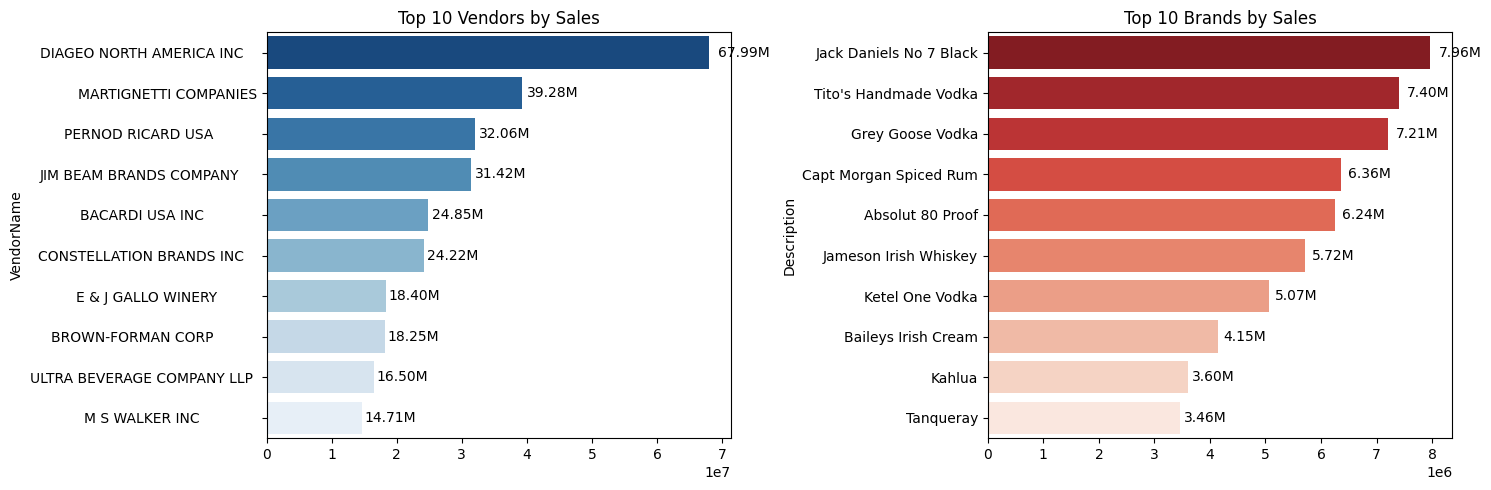

In [ ]:
plt.figure(figsize=(15,5))

#Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(x = top_vendors.values, y = top_vendors.index, palette = "Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
  ax1.text(bar.get_width() + (bar.get_width()*0.02),
  bar.get_y() + bar.get_height()/2,
  format_dollars(bar.get_width()),
  ha='left', va='center', fontsize=10, color='black')


#Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
  ax2.text(bar.get_width() + (bar.get_width()*0.02),
    bar.get_y() + bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Which vendors contribute the most to total purchase dollars?

In [ ]:
vendor_performance =  df1.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
})

In [ ]:
vendor_performance

,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
VendorName,,,
ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...
WEIN BAUER INC,42694.64,13522.49,56217.13
WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20


In [ ]:
vendor_performance =  df1.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(120, 4)

In [ ]:
vendor_performance['Purchase_Contribution%'] = (vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum())*100

In [ ]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008361
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912073
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693182


In [ ]:
vendor_performance.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'Purchase_Contribution%'],
      dtype='object')

In [ ]:
vendor_performance = round(vendor_performance.sort_values(by="TotalPurchaseDollars", ascending=False),2)

In [ ]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [ ]:
top_vendors.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'Purchase_Contribution%'],
      dtype='object')

In [ ]:
top_vendors['Purchase_Contribution%'].sum()

np.float64(65.68)

In [ ]:
top_vendors['Cummulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cummulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.68


In [ ]:
top_vendors.columns

Index(['VendorName', 'TotalPurchaseDollars', 'GrossProfit',
       'TotalSalesDollars', 'Purchase_Contribution%',
       'Cummulative_Contribution%'],
      dtype='object')

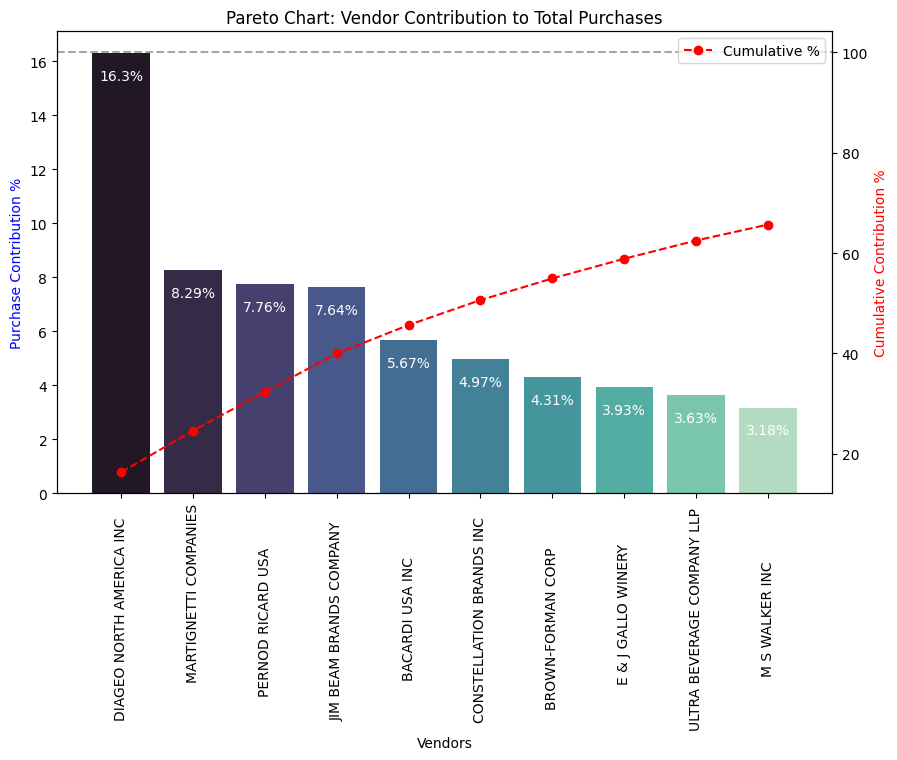

In [ ]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],  palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### How much of total procurement is dependent on the top vendors?

Total Purchase Contribution of top 10 vendors is 65.68 %


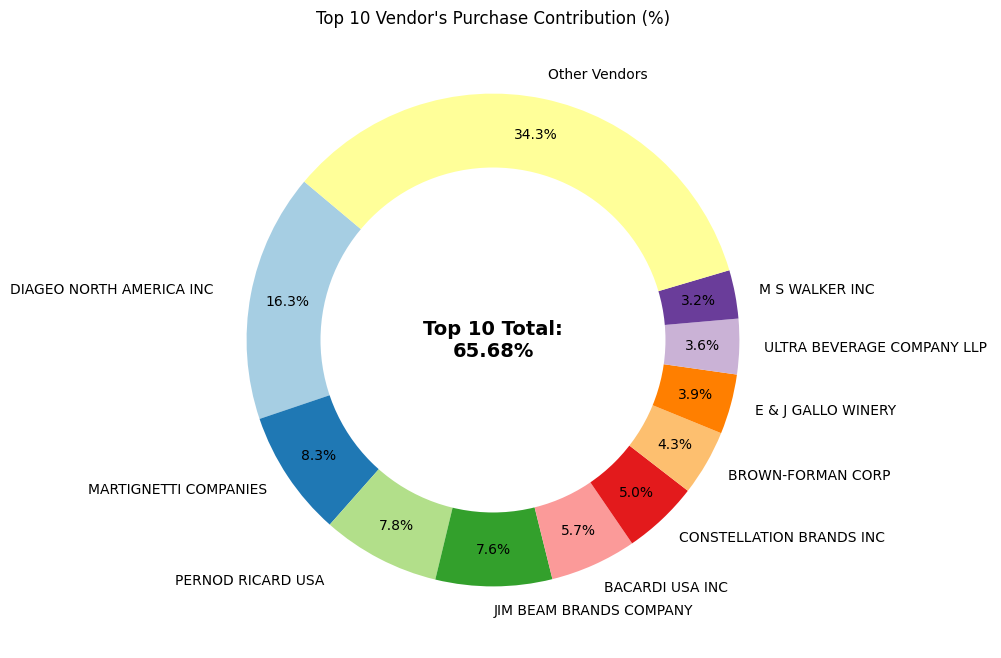

In [ ]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

The remaining vendors contribute only 34.31%, meaning they are not utilized effectively or may not be as competitive. If vendor dependency is too high, consider identifying new suppliers to reduce risk.

### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [ ]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df1["UnitPurchasePrice"] = df1["TotalPurchaseDollars"] / df1["TotalPurchaseQuantity"]

# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df1["OrderSize"] = pd.qcut(df1["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

# Analyze Cost Savings per Order Size
bulk_purchase_analysis = df1.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()
print(bulk_purchase_analysis)

  OrderSize  UnitPurchasePrice
0     Small          39.057543
1    Medium          15.486414
2     Large          10.777625


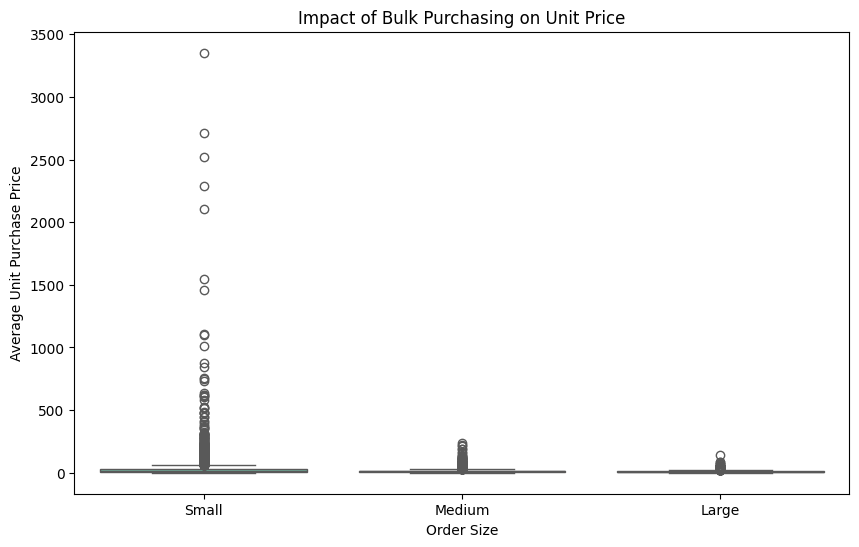

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

* The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [ ]:
# Identify Low Inventory Turnover Vendors
low_turnover_vendors = df1[df1["StockTurnover"] < 1].groupby("VendorName")["StockTurnover"].mean().reset_index()

# Sort by Lowest Turnover
low_turnover_vendors = low_turnover_vendors.sort_values(by="StockTurnover", ascending=True)
low_turnover_vendors.head(10)

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
61,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
79,SMOKY QUARTZ DISTILLERY LLC,0.783835
91,TAMWORTH DISTILLING,0.797078
92,THE IMPORTED GRAPE LLC,0.807569
102,WALPOLE MTN VIEW WINERY,0.820548


* Slow-moving inventory increases holding costs (warehouse rent, insurance, depreciation)

* Identifying vendors with low inventory turnover is critical for business efficiency, cost reduction, and profitability

### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [ ]:
# Calculate Unsold Inventory Value
df1["UnsoldInventoryValue"] = (df1["TotalPurchaseQuantity"] - df1["TotalSalesQuantity"]) * df1["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df1["UnsoldInventoryValue"].sum()))

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df1.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Capital: 2.71M


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
69,PERNOD RICARD USA,470.63K
117,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
80,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
62,MOET HENNESSY USA INC,126.48K
78,REMY COINTREAU USA INC,118.60K


### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.48, 42.62), Mean: 41.55


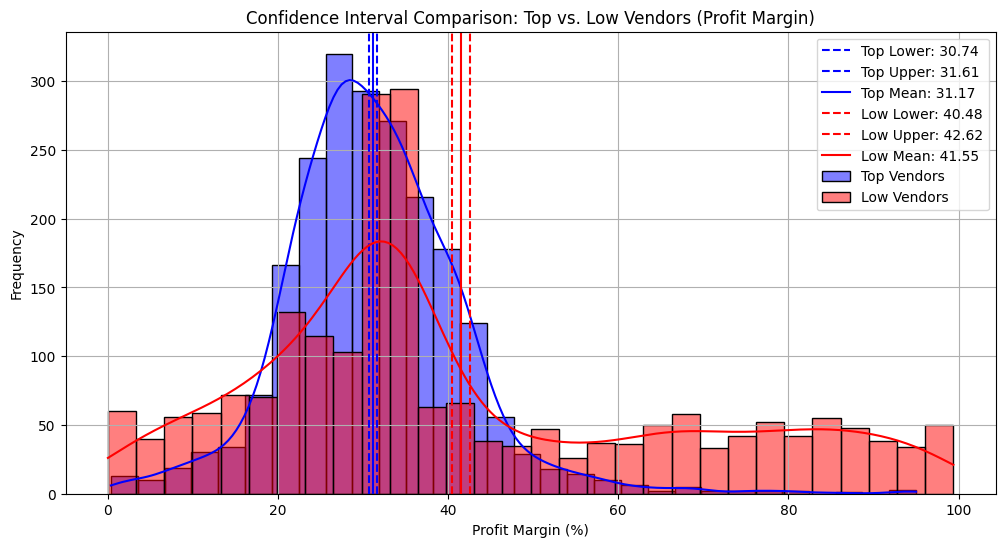

In [ ]:
# Define top and low vendors based on Total Sales Dollars (Top 25% & Bottom 25%)
top_threshold = df1["TotalSalesDollars"].quantile(0.75)
low_threshold = df1["TotalSalesDollars"].quantile(0.25)

top_vendors = df1[df1["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df1[df1["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Function to compute confidence interval
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

* The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

* For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

* For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [ ]:
top_threshold = df1["TotalSalesDollars"].quantile(0.75)
low_threshold = df1["TotalSalesDollars"].quantile(0.25)

top_vendors = df1[df1["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df1[df1["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6440, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


* A p-value this small suggests that the difference is not just statistically significant but also practically meaningful.

* The two vendor groups operate very differently in terms of profitability.